In [60]:
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html
import pandas as pd
from ipyleaflet import Map, Marker, Polyline


In [61]:
# https://towardsdatascience.com/find-and-plot-your-optimal-path-using-plotly-and-networkx-in-python-17e75387b873
# The OSMnx library helps to retrieve, analyze, and visualize street networks from OpenStreetMap
import osmnx as ox

In [25]:
print("vai se fuder, seu filho da puta!!!")

vai se fuder, seu filho da puta!!!


In [ ]:
## instaling pandasql
## https://towardsdatascience.com/how-to-use-sql-in-pandas-62d8a0f6341

import sys
#!{sys.executable} -m pip install pandasql

In [ ]:
# https://towardsdatascience.com/how-to-use-sql-in-pandas-62d8a0f6341
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

## Example
## q = """SELECT Name 
##       FROM df 
##       LIMIT 10;"""

##names = pysqldf(q)
##names

In [62]:
#https://ipyleaflet.readthedocs.io/en/latest/api_reference/marker.html
class Location:
    def __init__(self, pLat=36.3, pLong=137.97):
        self.latitude =pLat
        self.longitude=pLong

In [63]:
curitiba = Location(-25.43, -49.27)
matsumoto = Location(36.24, 137.98)
sendai = Location(38.23, 140.87)

In [65]:
curitiba

In [64]:
#loc = curitiba
loc = matsumoto
center = (loc.latitude, loc.longitude)

m = Map(center=center, zoom=15)

marker = Marker(location=center, draggable=True)
m.add_layer(marker);

display(m)

# Now that the marker is on the Map, you can drag it with your mouse,
# it will automatically update the `marker.location` attribute in Python

# You can also update the marker location from Python, that will update the
# marker location on the Map:
marker.location = (loc.latitude, loc.longitude)

Map(center=[36.24, 137.98], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

In [27]:
polygons =pd.read_csv("Data/shapes.txt")

In [28]:
polygons

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,498,43.64481,-79.38032,1,NaN
1,498,43.64072,-79.39890,2,NaN
2,498,43.64041,-79.40127,3,NaN
3,498,43.64013,-79.40603,4,NaN
4,498,43.64063,-79.42191,5,NaN
...,...,...,...,...,...
97280,479,45.41387,-75.65985,663,NaN
97281,479,45.41438,-75.65947,664,NaN
97282,479,45.41485,-75.65884,665,NaN
97283,479,45.41524,-75.65780,666,NaN


In [ ]:
# https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
len(polygons['shape_id'].unique())

In [ ]:
# https://pypi.org/project/LatLon/
polygons.columns

In [ ]:
print(polygons['shape_id'].unique())

In [ ]:
dict_locations = {}
dir(dict_locations.items)

In [31]:
## https://towardsdatascience.com/how-to-select-rows-from-pandas-dataframe-based-on-column-values-d3f5da421e93
## iterate over all distinct shapes
## iterate over every pair (lat, long) of the shapes
## create a dictionary <shape_id, Location()>
dict_locations = {}
for shape_id in polygons['shape_id'].unique():
    #print("shape_id : " , shape_id)
    ## initialize with empty list
    dict_locations[shape_id] =[]
    df = polygons.loc[polygons['shape_id'] == shape_id].sort_values(by=["shape_id", "shape_pt_sequence"])
    for row in df.itertuples():
        dict_locations[shape_id].append(Location(row.shape_pt_lat, row.shape_pt_lon))

In [ ]:
len(dict_locations)

In [ ]:
dict_locations.keys()

In [ ]:
dict_locations[498]

In [ ]:

line = Polyline(locations = [[[[curitiba.latitude, curitiba.longitude], [matsumoto.latitude, matsumoto.longitude]],]] ,
                color="green",
                fill_color="green"                
               )
m.add_layer(line)Map

In [ ]:
## empty list
polyLines = []

## just one shape_id
for loc in dict_locations[498]:
    ## print(loc.latitude)
    ## add to polyLines (lat, lon)
    polyLines.append([loc.latitude, loc.longitude])

### creates a list of points and draw the lines
lines = Polyline(
    locations = [polyLines]
    , color="green",
    fill=False
)

## recenter the map
m = Map(center = polyLines[0], zoom=2)

## add lines
m.add_layer(lines)

## show map
m

In [34]:
### Function to get locations

def get_list_locations(pDictLocations,  pLat, pLon):
    ## empty lists
    listLocations = []


## dictColors
#dictColors ={0:"green", 1:"gray", 2:"blue", 3:"black"}


## all shape_id
    for dictKey in pDictLocations.keys():
        polyLines = []
        for loc in pDictLocations[dictKey]:
        ## print(loc.latitude)
        ## add to polyLines (lat, lon)
            polyLines.append([loc[pLat], loc[pLon]])
state = ox.gdf_from_place('Georgia, US') 
    #print("shape_id: ", shape_id)
    #print(len(polyLines))
        listLocations.append(polyLines)
    
    #print(len(listLocations))
    return listLocations

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 25)

In [33]:
listLocations = get_list_locations(dict_locations, "latitude", "longitude")

TypeError: 'Location' object is not subscriptable

In [35]:
## empty lists
listLocations = []


## dictColors
#dictColors ={0:"green", 1:"gray", 2:"blue", 3:"black"}


## all shape_id
for shape_id in dict_locations.keys():
    polyLines = []
    for loc in dict_locations[shape_id]:
        ## print(loc.latitude)
        ## add to polyLines (lat, lon)
        polyLines.append([loc.latitude, loc.longitude])

    #print("shape_id: ", shape_id)
    #print(len(polyLines))
    listLocations.append(polyLines)
    
    #print(len(listLocations))

In [36]:
len(listLocations[0])

184

In [42]:

### creates a list of points and draw the lines
lines = Polyline(
    locations = [listLocations]
    , color="black",
    fill=False
)


## recenter the map
m = Map(center = polyLines[0], zoom=2)

## add lines
m.add_layer(lines)

## show map
m

Map(center=[43.64481, -79.38032], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [38]:
### reading stops
stops = pd.read_csv("Data/stops.txt")

In [ ]:
stops

In [46]:
## https://github.com/gboeing/osmnx-examples/blob/main/notebooks/01-overview-osmnx.ipynb
%matplotlib inline
ox.__version__

'1.1.1'

In [48]:
# turn response caching off
ox.config(use_cache=False)

# turn it back on and turn on logging to your terminal window
ox.config(use_cache=True, log_console=True)

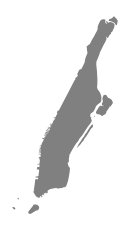

In [49]:
# get the boundary polygon for manhattan, project it, and plot it
city = ox.geocode_to_gdf("Manhattan, New York, USA")
city_proj = ox.project_gdf(city)
ax = city_proj.plot(fc="gray", ec="none")
_ = ax.axis("off")

In [50]:
city

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"MULTIPOLYGON (((-74.04722 40.69086, -74.04722 ...",40.880449,40.683941,-73.906159,-74.047222,312415317,relation,8398124,40.789624,-73.959894,"Manhattan, New York County, New York, United S...",boundary,administrative,0.985439


In [51]:
quebecCity = ox.geocode_to_gdf("Quebec, Quebec")

In [52]:
quebecCity

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-71.54922 46.85118, -71.53139 46.838...",46.98068,46.72771,-71.133661,-71.549217,258512581,relation,2319206,46.813743,-71.208406,"Quebec City, Québec (Agglomération), Capitale-...",boundary,administrative,0.842861


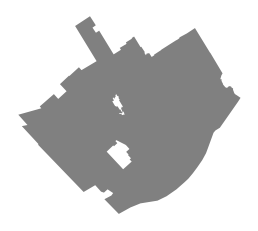

In [53]:
qc_proj = ox.project_gdf(quebecCity)
ax = qc_proj.plot(fc="gray", ec="none")
_ = ax.axis("off")

In [57]:
quebecProv_proj = ox.geocode_to_gdf("Quebec, Canada")

In [58]:
quebecProv_proj

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-79.77414 54.63557, -79.77348 54.633...",62.580486,44.991369,-57.105486,-79.774135,258336560,relation,61549,52.476089,-71.825867,"Quebec, Canada",boundary,administrative,0.972721


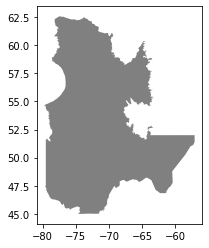

In [59]:
ax = quebecProv_proj.plot(fc="gray", ec="none") 


In [ ]:
for row in polygons.itertuples():
    print(row)
    print(row.shape_pt_lat)
    print(row.shape_pt_lon)


In [ ]:
type(row)